# Introduction

The aim of this guided project is to explore the use of the plotting functionality within the pandas library to create informative data visualizations within Jupyter Notebooks that allow us to answer questions about the dataset. Some examples of questions that can be answered using visualizations are listed below.
1. Do students in more popular majors make more money?
2. How many majors are predominantly male? Predominantly female?
3. Which category of majors have the most students?


The dataset that will be used in this project contains information on the job outcomes of students who graduated from college between the years of 2010 and 2012. The data was originally released by American Community Survey and was subsequently cleaned by FiveThirtyEight and posted to their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset contains information on a student who graduated with a major from college. Some of the rows of the dataset are described below:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [1]:
#Import required libraries and print some preview information to get to know the dataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


# Data Cleaning & Statistics Preview
---
Missing information will cause errors when plotting information from the dataset. Let's drop rows with missing values and generate a summary of statistics about the dataset using df.describe():

In [2]:
print('Length before removing "NA" rows:', len(recent_grads))
recent_grads.dropna()
print('Length after removing "NA" rows:', len(recent_grads))

recent_grads.describe()

Length before removing "NA" rows: 173
Length after removing "NA" rows: 173


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


No rows were removed using df.dropna which indicates that there was no missing information in the dataset. We can therefore plot using the entire dataset.

Scatter plots are generated below to explore the relationships between the following columns:
- Median vs Total
- Unemployment_rate vs Sample_size 
- Median vs Full_time
- Median vs ShareWomen
- Median vs Men
- Median vs Women


Text(0.5, 1.0, 'Median Salary vs. Number of Graduates')

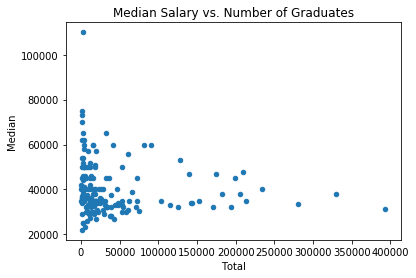

In [3]:
ax = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax.set_title('Median Salary vs. Number of Graduates')

Text(0.5, 1.0, 'Unemployment Rate vs. Sample Size')

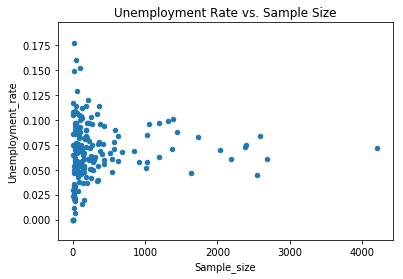

In [4]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment Rate vs. Sample Size')

Text(0.5, 1.0, 'Median Salary vs. No. of Full Time Employees')

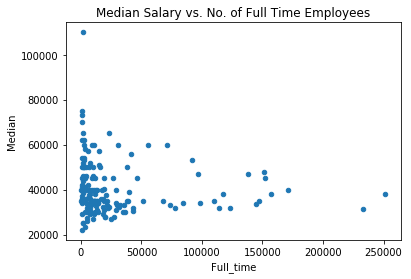

In [5]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Median Salary vs. No. of Full Time Employees')

Text(0.5, 1.0, 'Median vs ShareWomen')

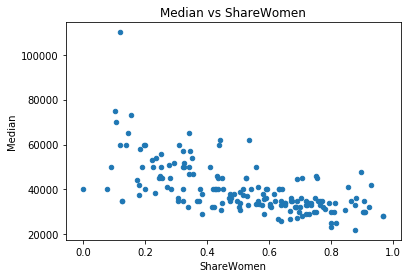

In [6]:
ax = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax.set_title('Median vs ShareWomen')

Text(0.5, 1.0, 'Median vs. Men')

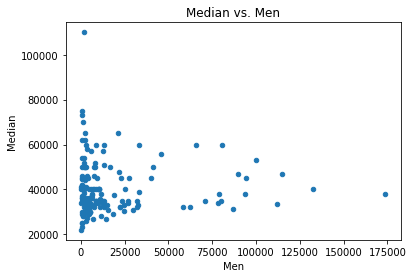

In [7]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Median vs. Men')

Text(0.5, 1.0, 'Median vs. Women')

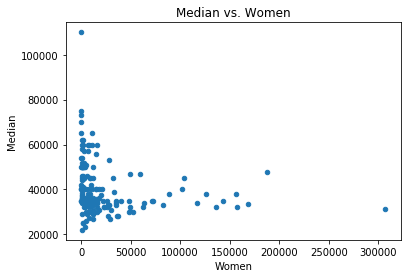

In [8]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Median vs. Women')

# Scatter Plot Insights:
Some interesteing insights can already be made from the scatter plots above:
- A higher number of full-time employees does not result in a siginificant increase in median salary
- The median salary of employees decreased for an increase in the share of women graduating from a given major
- There is a large range in median salaries for majors with few graduates but the salaries for these majors are commonly low
- There is a decreasing trend for mean salary as the number of graduates increases

# Histograms
Histograms can be used to investigate the distribution of values in a column. Histograms are plotted below for the following columns:
- Sample_size
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate
- Men
- Women

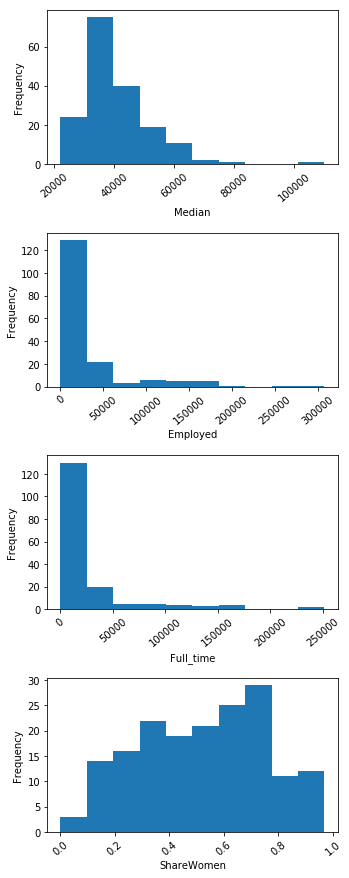

In [9]:
cols = ["Sample_size", "Median", "Employed", "Full_time", 
        "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    fig.tight_layout()
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    plt.xlabel(cols[r])

# Histogram Insights:
Some of the trends noted from the histograms above are listed below:
- The median salary is a right-skewed normal distribution. The most common median salary is between \\$30 000 - \\$40 000
- The histograms for number employed and number employed full-time have very similar shapes indicating that if employees find work, it is usually a full-time post
- A large numbermajors have a share of women between 50% and 80% of the total

# Scatter Matrix Plots
Scatter matrix plots combine scatter plots and historgrams into one grid of plots and allow for exploration of potentional relationships and distributions simultaneoulsy.

Scatter matrix plots are made below to explore relationships and/or distributions of the Sample_size, Median and Unemployment_rate columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D653464B70>,
      dtype=object)

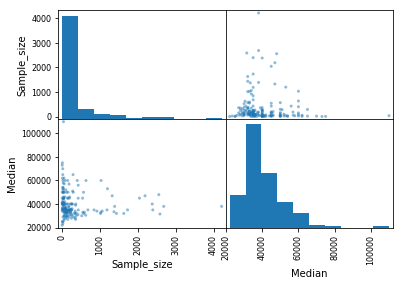

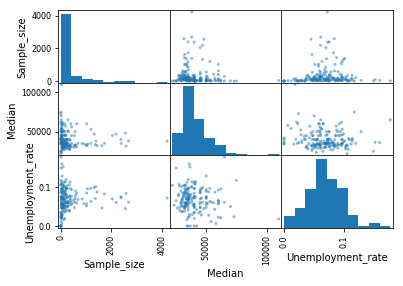

In [10]:
from pandas.plotting import scatter_matrix as sm
sm(recent_grads[['Sample_size','Median']])
sm(recent_grads[['Sample_size','Median','Unemployment_rate']])

# Scatter Matrix Insights:
1. The largest range in median salary and unemployment rate are seen for the smallest sample sizes. This is to be expected since there are far more data points recorded for smaller sample sizes. Unfortunately, the conclusions made from data with smaller sample sizes will be less representative if there were many graduates from that major.

2. The unemployment rate is very scattered for small sample sizes but its mean is well-represented by both medium and large sample sizes.

3. The median salary is fairly concentrated and low for majors with high unemployment rates. This may indicate competitiveness amongst employees giving employers an advantage in salary negotiations

# Bar Plots
Bar charts are plotted below for the first 10 and last 10 rows of the dataset to analyse the share of women in those 20 majors. 

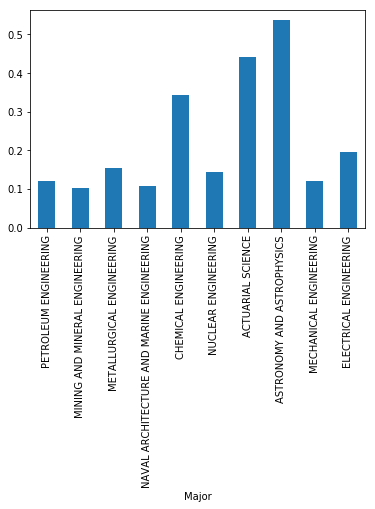

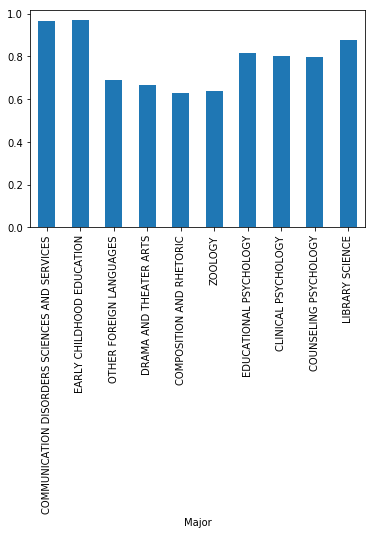

In [11]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

### Analysis of Number of Graduates 
The data above does not provide much significant information since only 20 of the 173 rows are being analysed. Let's rather investigate the total number of graduates for each major catergory and then analyse the number of male and female graduates in each of those categories:

In [12]:
num_grads = {}
for val in recent_grads['Major_category'].unique():
    current_grad = recent_grads[recent_grads['Major_category'] == val]
    num_grads[val] = current_grad['Total'].sum()

num_students = pd.Series(num_grads).sort_values(ascending = False)
num_students

Business                               1302376.0
Humanities & Liberal Arts               713468.0
Education                               559129.0
Engineering                             537583.0
Social Science                          529966.0
Psychology & Social Work                481007.0
Health                                  463230.0
Biology & Life Science                  453862.0
Communications & Journalism             392601.0
Arts                                    357130.0
Computers & Mathematics                 299008.0
Industrial Arts & Consumer Services     229792.0
Physical Sciences                       185479.0
Law & Public Policy                     179107.0
Agriculture & Natural Resources          75620.0
Interdisciplinary                        12296.0
dtype: float64

Text(0, 0.5, 'Number of Women')

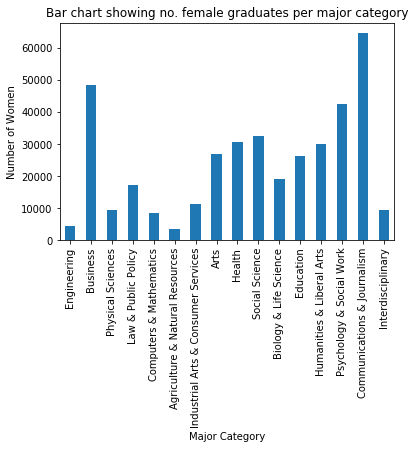

In [13]:
num_women_dict = {}
for val in recent_grads['Major_category'].unique():
    current_grad = recent_grads[recent_grads['Major_category'] == val]
    num_women_dict[val] = current_grad['ShareWomen'].mean()*current_grad['Total'].mean()

num_women = pd.Series(num_women_dict)    
num_women.plot.bar(title = "Bar chart showing no. female graduates per major category")
plt.xlabel('Major Category')
plt.ylabel('Number of Women')

Text(0, 0.5, 'Number of Men')

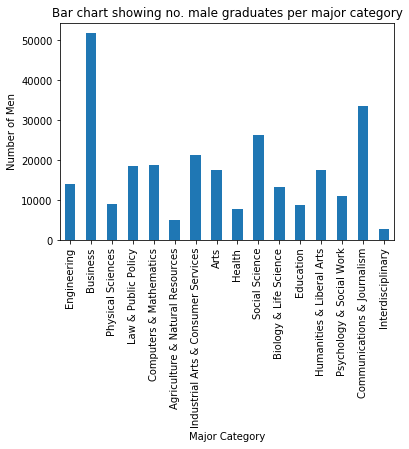

In [14]:
num_men_dict = {}
for val in recent_grads['Major_category'].unique():
    current_grad = recent_grads[recent_grads['Major_category'] == val]
    num_men_dict[val] = (1-current_grad['ShareWomen'].mean())*current_grad['Total'].mean()

num_men = pd.Series(num_men_dict)    
num_men.plot.bar(title = "Bar chart showing no. male graduates per major category")
plt.xlabel('Major Category')
plt.ylabel('Number of Men')

### Insights

The top 5 degrees, ranked by total number of graduates, are:
1. Business                               
2. Humanities & Liberal Arts             
3. Education                             
4. Engineering                            
5. Social Science

The degrees with the highest number of male and female graduates are shown below
###### <center>Degrees with highest number of graduates of each gender:</center>
|Rank|Women|Men|
|---|---|---|
|1|Communications & Journalism|Business|
|2|Business|Communications & Journalism|
|3|Pshycology & Social Work|Social Science|

### Analysis of Popularity of each category amongst males & females
A similar exercie to the one above is repeated below but instead of looking at the actual number of graduates, only the percentage of males and females from each major category are considered. Note that since ShareWomen is expressed as a percentage of the total, the share of male graduates is 100 - ShareWomen

Text(0, 0.5, 'Share of Women (%)')

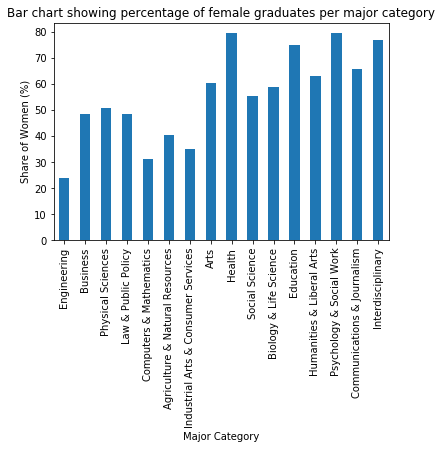

In [15]:
pct_women_dict = {}
for val in recent_grads['Major_category'].unique():
    current_grad = recent_grads[recent_grads['Major_category'] == val]
    pct_women_dict[val] = current_grad['ShareWomen'].mean()*100

share_women = pd.Series(pct_women_dict)    
share_women.plot.bar(title = "Bar chart showing percentage of female graduates per major category")
plt.xlabel('Major Category')
plt.ylabel('Share of Women (%)')

### Insights
###### <center>Popularity of degree categories amongst each gender:</center>
|Rank|Women|Men|
|---|---|---|
|1|Health|Engineering|
|2|Pshycology & Social Work|Computers & Mathematics|
|3|Interdisciplinary|Industrial Arts & Consumer Services|

### Highest earning majors

Text(0, 0.5, 'Mean Salary')

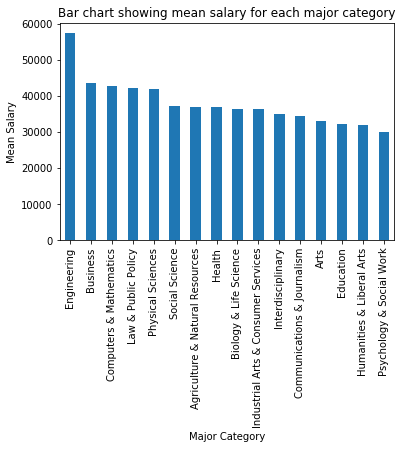

In [16]:
earnings = {}
for val in recent_grads['Major_category'].unique():
    current_grad = recent_grads[recent_grads['Major_category'] == val]
    earnings[val] = current_grad['Median'].mean()

earnings_cat = pd.Series(earnings) 
earnings_cat = earnings_cat.sort_values(ascending = False)
earnings_cat.plot.bar(title = "Bar chart showing mean salary for each major category")
plt.xlabel('Major Category')
plt.ylabel('Mean Salary')

### Insights
###### <center>Major categories with highest salaries:</center>
|Rank|Major Category|
|---|---|
|1|Engineering|
|2|Business|
|3|Computers & Mathematics|

# Conclusions
---
This project aimed to make use of data visualizations to answer questions about a dataset of recent graduates. Fortunately, no data cleaning was required and the charts could be plotted without any modifications to the dataset.

The key information gathered from this analysis is listed below:
- The three most popular majors (by number of graduates) amongst women are:
        1. Communications & Journalism
        2. Business
        3. Pshycology & Social Work
        
- The three most popular majors (by number of graduates) amongst men are:
        1. Business
        2. Communications & Journalism
        3. Social Science
        
- The three highest earning major categories are:
        1. Engineering
        2. Business
        3. Computers & Mathematics
- The median salary was lower for for majors with a large share of female graduates
- There is a decreasing trend for mean salary as the number of graduates increases. This indicates that graduates of more popular majors do not make more money
- Most majors have a nearly even split of male and female graduates
- The 3 most popular degrees, ranked by total number of graduates, are:
1. Business                               
2. Humanities & Liberal Arts             
3. Education                             

        


